The Loan Dataset of a bank is given

1. Read the dataset to the python environment.

2. Do necessary pre-processing steps.

3. Perform different Ensemble Learning techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Datasets MLAI/train_loan.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.Loan_ID.nunique()

614

In [8]:
#The feature Loan_ID can be dropped

In [9]:
data=data.drop('Loan_ID',axis=1)

**Data Visualization**

<Axes: xlabel='Gender', ylabel='count'>

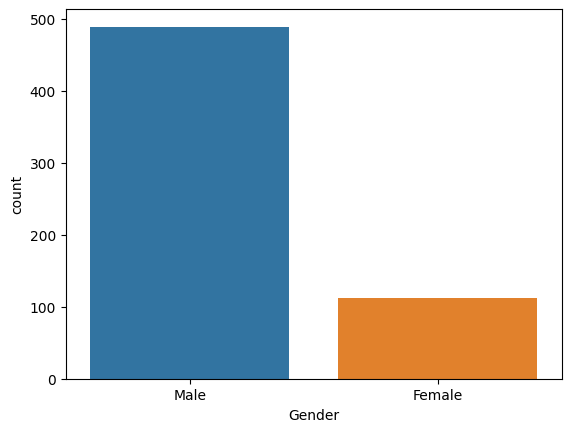

In [10]:
sns.countplot(data,x='Gender')

<Axes: xlabel='Loan_Status', ylabel='count'>

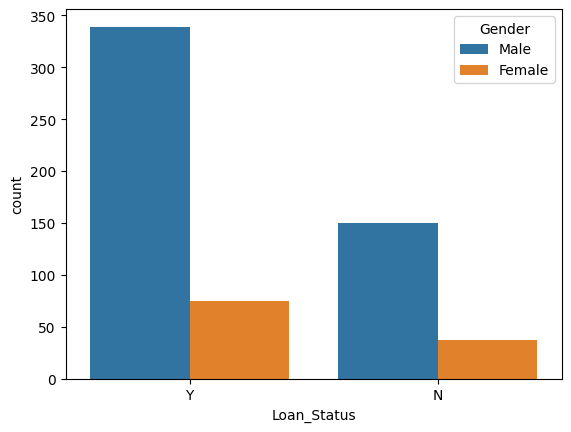

In [11]:
sns.countplot(data,x='Loan_Status',hue='Gender')

<Axes: xlabel='Married', ylabel='count'>

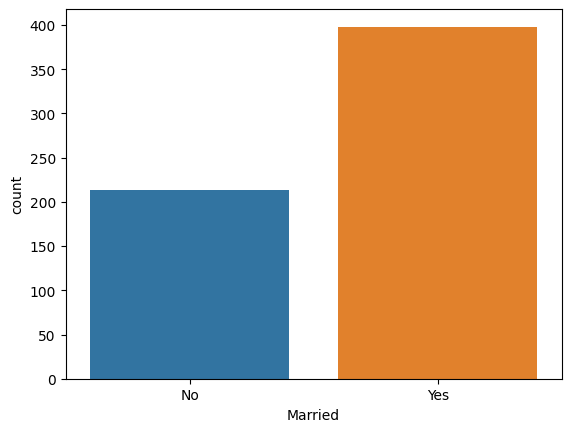

In [12]:
sns.countplot(data,x='Married')

<Axes: xlabel='Loan_Status', ylabel='count'>

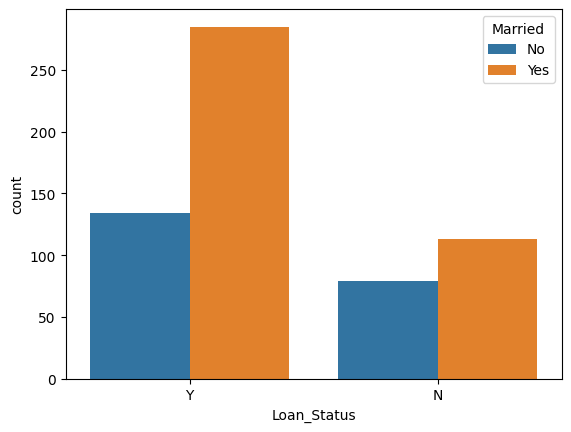

In [13]:
sns.countplot(data,x='Loan_Status',hue='Married')

<Axes: xlabel='Dependents', ylabel='count'>

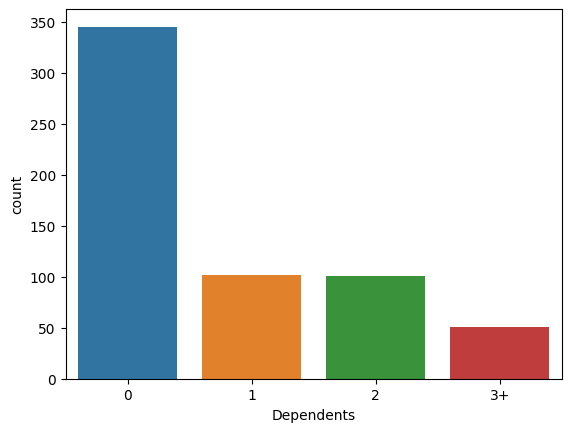

In [14]:
sns.countplot(data,x='Dependents')

<Axes: xlabel='Loan_Status', ylabel='count'>

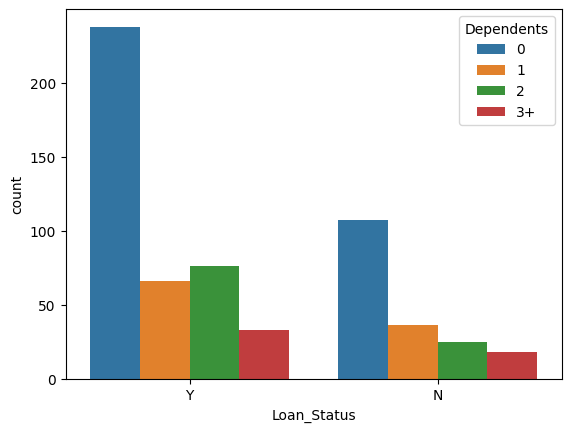

In [15]:
sns.countplot(data,x='Loan_Status',hue='Dependents')

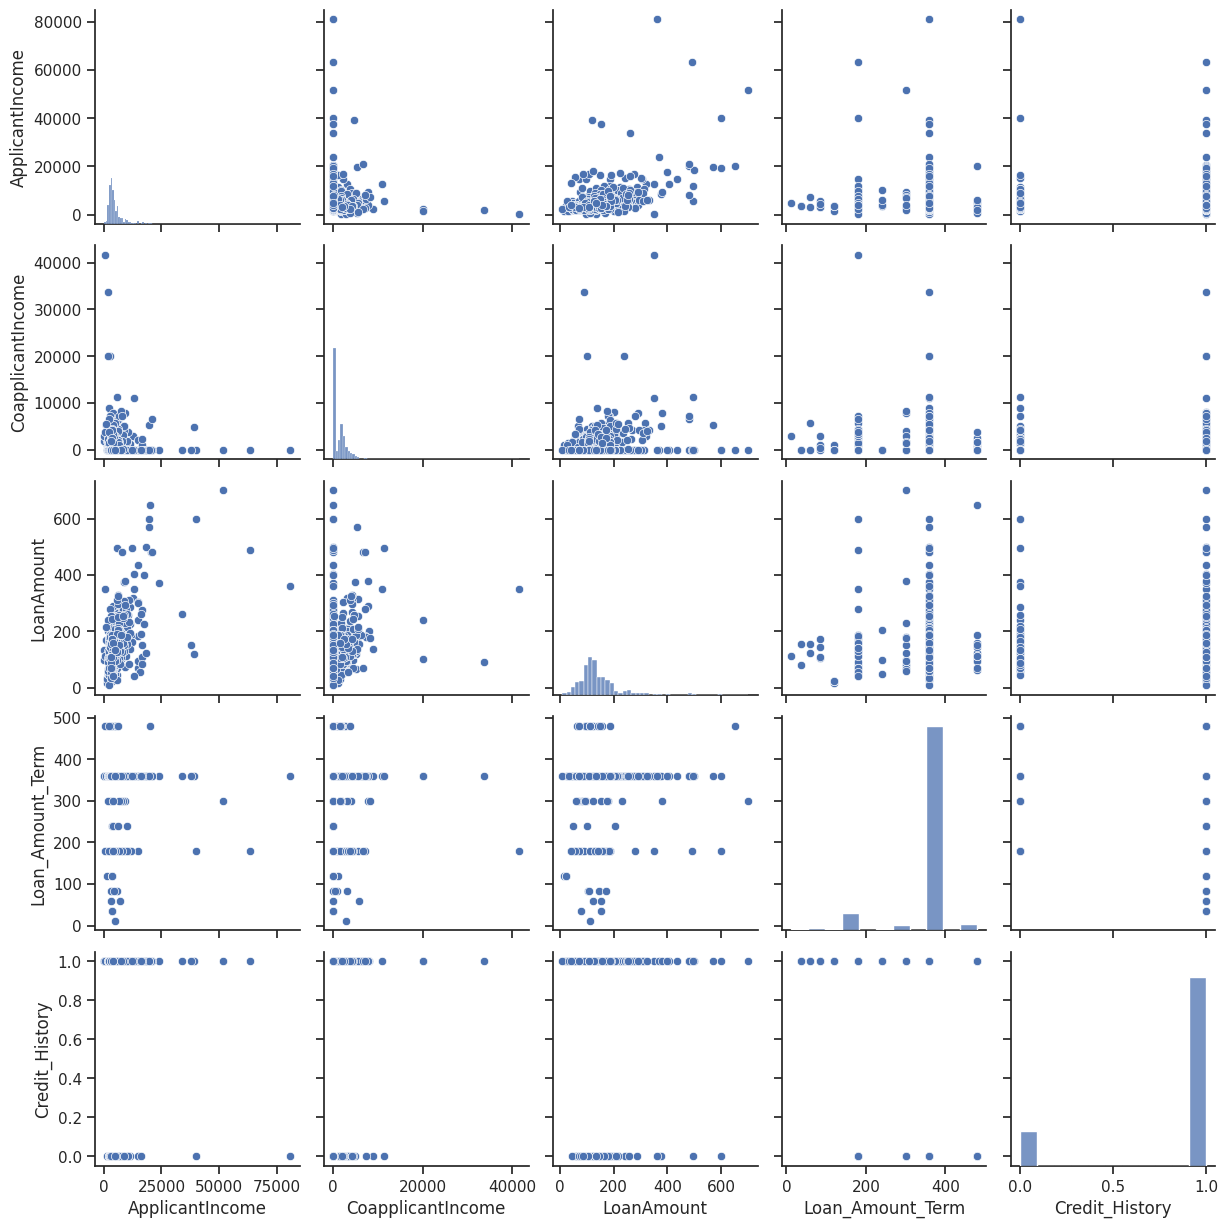

In [16]:
sns.set(style="ticks")
sns.pairplot(data)
plt.show()

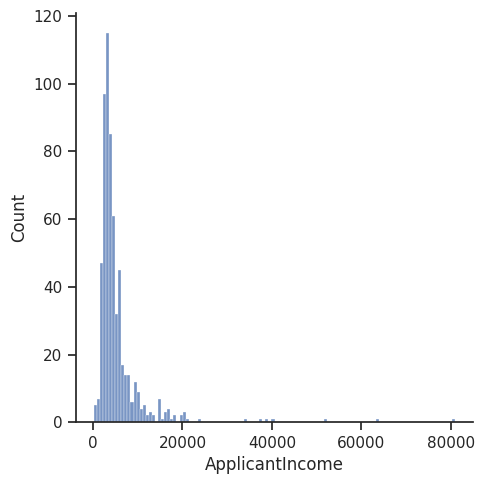

In [17]:
sns.displot(data['ApplicantIncome'])


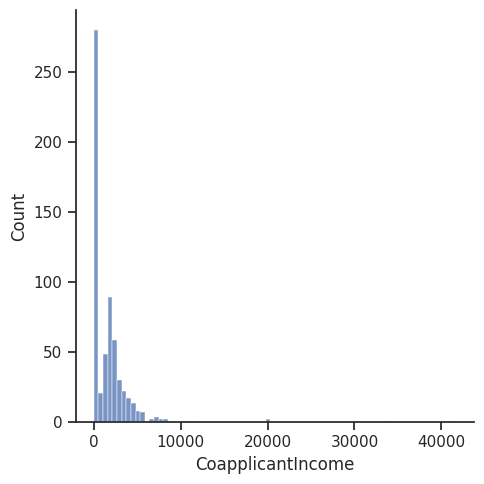

In [18]:
sns.displot(data['CoapplicantIncome'])

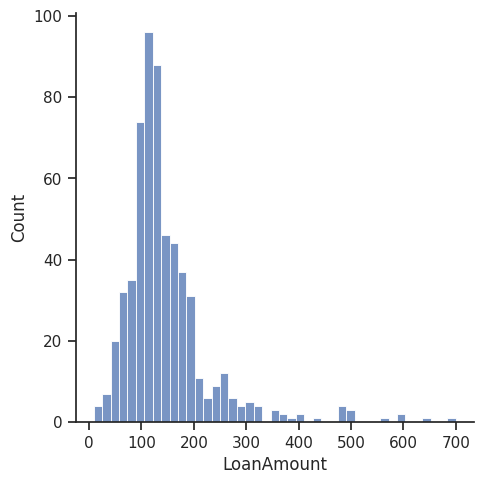

In [19]:
sns.displot(data['LoanAmount'])

**Handling Missing Values**

In [20]:
data_categorical=data.select_dtypes(include='object') #separate categorical variables

In [21]:
data_categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [22]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         601 non-null    object
 1   Married        611 non-null    object
 2   Dependents     599 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  582 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


In [23]:
for i in data_categorical:
  mode_value=data[i].mode()[0]
  data_categorical[i]=data_categorical[i].fillna(mode_value) #filling the missing values in categorical variables with mode

In [24]:
data_numerical=data.select_dtypes([int,float])

In [25]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


In [26]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=10)
data_numerical=knn.fit_transform(data_numerical) #filling the missing values in numerical variables with KNN imputer

In [27]:
data_numerical

array([[5.849e+03, 0.000e+00, 1.548e+02, 3.600e+02, 1.000e+00],
       [4.583e+03, 1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00],
       [3.000e+03, 0.000e+00, 6.600e+01, 3.600e+02, 1.000e+00],
       ...,
       [8.072e+03, 2.400e+02, 2.530e+02, 3.600e+02, 1.000e+00],
       [7.583e+03, 0.000e+00, 1.870e+02, 3.600e+02, 1.000e+00],
       [4.583e+03, 0.000e+00, 1.330e+02, 3.600e+02, 0.000e+00]])

In [28]:
data_numerical=pd.DataFrame(data_numerical) # converting array into dataframe

In [29]:
data_numerical

,0,1,2,3,4
0,5849.0,0.0,154.8,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [30]:
data_numerical.columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [31]:
data=pd.concat([data_numerical,data_categorical],axis=1) #Concatenation of categorical features and numerical features

In [32]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,154.8,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,4583.0,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000.0,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583.0,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000.0,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,Female,No,0,Graduate,No,Rural,Y
610,4106.0,0.0,40.0,180.0,1.0,Male,Yes,3+,Graduate,No,Rural,Y
611,8072.0,240.0,253.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban,Y
612,7583.0,0.0,187.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban,Y


In [33]:
data['Dependents']=data['Dependents'].str.replace('+','') #Replacing '+' in Dependent feature

<ipython-input-33-5206220c5d96>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','') #Replacing '+' in Dependent feature


In [34]:
data['Dependents'].dtypes

dtype('O')

In [35]:
data['Dependents']=data['Dependents'].astype(int) #Changing the datatype of Dependent feature into int

In [36]:
data['Dependents'].dtypes

dtype('int64')

In [37]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,154.8,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,4583.0,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000.0,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583.0,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000.0,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,Female,No,0,Graduate,No,Rural,Y
610,4106.0,0.0,40.0,180.0,1.0,Male,Yes,3,Graduate,No,Rural,Y
611,8072.0,240.0,253.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban,Y
612,7583.0,0.0,187.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban,Y


**Outlier handling using Floor and Capping Method**

<Axes: >

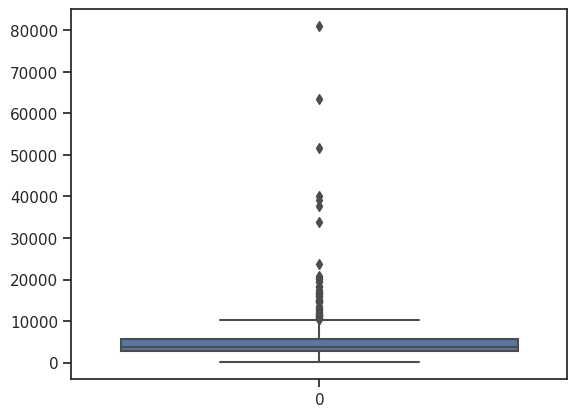

In [38]:
sns.boxplot(data['ApplicantIncome'])

<Axes: >

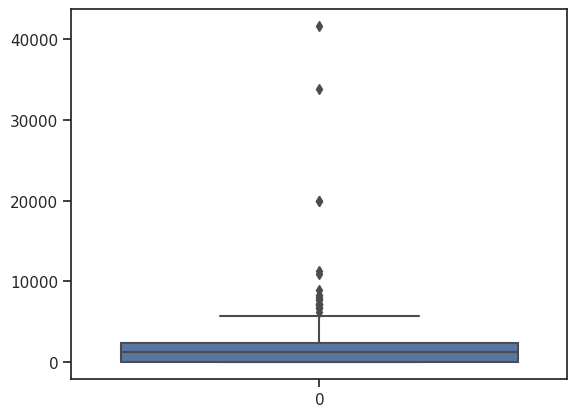

In [39]:
sns.boxplot(data['CoapplicantIncome'])

<Axes: >

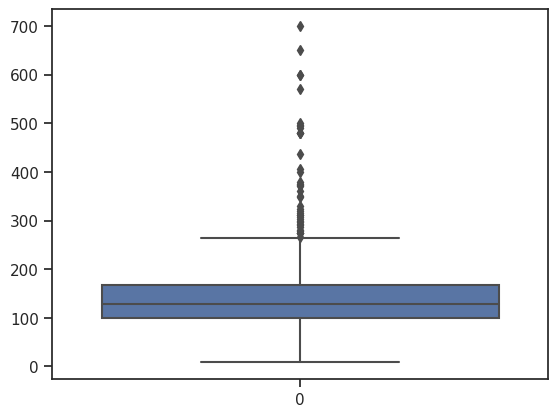

In [40]:
sns.boxplot(data['LoanAmount'])

In [41]:
ceiling_values = {'ApplicantIncome': 50000, 'CoapplicantIncome': 20000, 'LoanAmount': 500}
floor_values = {'ApplicantIncome': 0, 'CoapplicantIncome': 0, 'LoanAmount': 0} #Defining ceiling and floor values

In [42]:
for i in data.columns:
    if i in ceiling_values:
        ceiling = ceiling_values[i]
        floor = floor_values[i]
        data[i] = np.clip(data[i], floor, ceiling) #replacing outliers using ceiling and floor values

In [43]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,154.8,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,4583.0,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000.0,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583.0,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000.0,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,Female,No,0,Graduate,No,Rural,Y
610,4106.0,0.0,40.0,180.0,1.0,Male,Yes,3,Graduate,No,Rural,Y
611,8072.0,240.0,253.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban,Y
612,7583.0,0.0,187.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban,Y


In [44]:
data.shape

(614, 12)

In [45]:
#distribution plot after outlier handling

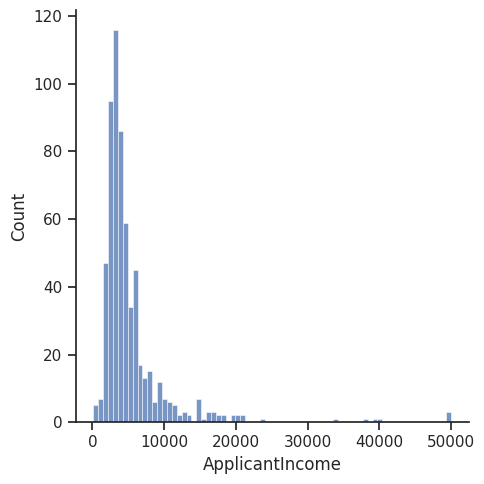

In [46]:
sns.displot(data['ApplicantIncome'])

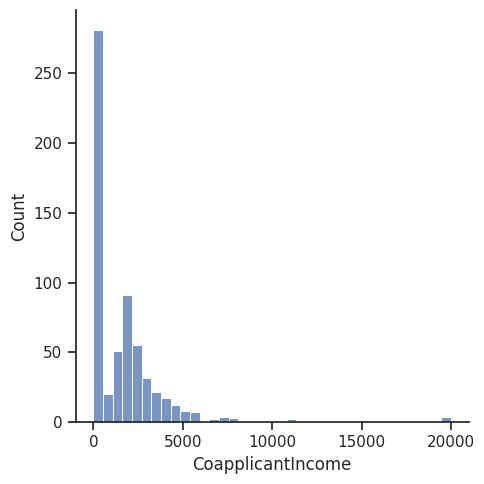

In [47]:
sns.displot(data['CoapplicantIncome'])

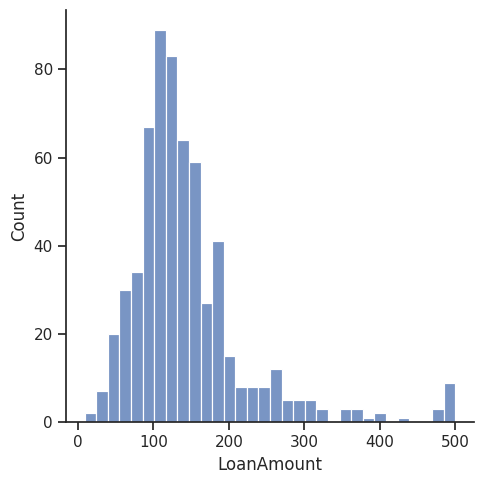

In [48]:
sns.displot(data['LoanAmount'])

In [49]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']   #Separating dependent and independent variables

In [50]:
x.shape

(614, 11)

In [51]:
y.shape

(614,)

**Encoding**

In [52]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [53]:
data.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Gender']=le.fit_transform(x['Gender'])
x['Married']=le.fit_transform(x['Married'])
x['Education']=le.fit_transform(x['Education'])
x['Self_Employed']=le.fit_transform(x['Self_Employed'])  #Label Encoding


In [55]:
x=pd.get_dummies(x)                         #One hot encoding remaining columns

In [56]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,154.8,360.0,1.0,1,0,0,0,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,1,0,0
610,4106.0,0.0,40.0,180.0,1.0,1,1,3,0,0,1,0,0
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,2,0,0,0,0,1


In [57]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**SMOTE-Oversampling Technique to nullify data imbalance**

In [58]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset to balance classes
x, y= smote.fit_resample(x, y)

In [59]:
x.shape

(844, 13)

In [60]:
y.shape

(844,)

**Feature Scaling-Standard Scaler**

In [61]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)

In [62]:
x

array([[ 0.1366837 , -0.69103257,  0.13844474, ..., -0.57917445,
        -0.64506386,  1.62417088],
       [-0.12253527, -0.01081988, -0.21041573, ...,  1.72659552,
        -0.64506386, -0.61569876],
       [-0.44666136, -0.69103257, -1.017481  , ..., -0.57917445,
        -0.64506386,  1.62417088],
       ...,
       [-0.27001366, -0.69103257, -1.05998707, ..., -0.57917445,
        -0.64506386, -0.61569876],
       [ 0.72953112,  1.21307399,  2.19159706, ...,  1.72659552,
        -0.64506386, -0.61569876],
       [ 0.90105875, -0.69103257,  1.10472572, ..., -0.57917445,
        -0.64506386, -0.61569876]])

In [63]:
x=pd.DataFrame(x)

In [64]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.136684,-0.691033,0.138445,0.293066,0.602116,0.548144,-1.159502,-0.689136,-0.487377,-0.339009,-0.579174,-0.645064,1.624171
1,-0.122535,-0.010820,-0.210416,0.293066,0.602116,0.548144,0.862439,0.374174,-0.487377,-0.339009,1.726596,-0.645064,-0.615699
2,-0.446661,-0.691033,-1.017481,0.293066,0.602116,0.548144,0.862439,-0.689136,-0.487377,2.949771,-0.579174,-0.645064,1.624171
3,-0.532044,0.372589,-0.314553,0.293066,0.602116,0.548144,0.862439,-0.689136,2.051798,-0.339009,-0.579174,-0.645064,1.624171
4,0.167602,-0.691033,-0.041192,0.293066,0.602116,0.548144,-1.159502,-0.689136,-0.487377,-0.339009,-0.579174,-0.645064,1.624171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,-0.125622,-0.691033,-0.526218,0.293066,0.311976,-1.824337,-1.159502,0.374174,-0.487377,-0.339009,-0.579174,-0.645064,-0.615699
840,1.204728,-0.691033,-0.412430,0.293066,0.468519,0.548144,-1.159502,-0.689136,-0.487377,-0.339009,-0.579174,-0.645064,-0.615699
841,-0.270014,-0.691033,-1.059987,0.293066,0.562930,-1.824337,-1.159502,0.374174,-0.487377,-0.339009,-0.579174,-0.645064,-0.615699
842,0.729531,1.213074,2.191597,0.293066,0.431688,0.548144,-1.159502,-0.689136,-0.487377,-0.339009,1.726596,-0.645064,-0.615699


**Splitting data into train and test data**

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Ensemble Method**

**Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_predictions=rf_clf.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8402366863905325
Precision= 0.8483431455283083
recall_score= 0.8402366863905325
f1_score= 0.8407300425893477


array([[75, 19],
       [ 8, 67]])

**Gradient Boost Classifier**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [70]:
y_predictions=gb.predict(x_test)

In [71]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.834319526627219
Precision= 0.8624463693853068
recall_score= 0.834319526627219
f1_score= 0.8339365443057493


array([[69, 25],
       [ 3, 72]])

**LGBoost Classifier**

In [72]:
! pip install lightgbm

In [73]:
from lightgbm import LGBMClassifier

In [74]:
lgbc=LGBMClassifier()
lgbc.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 347, number of negative: 328
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 675, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514074 -> initscore=0.056311
[LightGBM] [Info] Start training from score 0.056311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMClassifier()

In [75]:
y_predictions=lgbc.predict(x_test)

In [76]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8579881656804734
Precision= 0.8674834901787092
recall_score= 0.8579881656804734
f1_score= 0.8584065507142432


array([[76, 18],
       [ 6, 69]])

**AdaBoost Classifier**

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [78]:
y_predictions = ada.predict(x_test)

In [79]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.834319526627219
Precision= 0.8675580829426984
recall_score= 0.834319526627219
f1_score= 0.8336228047038683


array([[68, 26],
       [ 2, 73]])

**Catboost Classifier**

In [80]:
!pip install catboost

In [81]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()

In [82]:
model.fit(x_train, y_train)

Learning rate set to 0.008711
0:	learn: 0.6885826	total: 48.2ms	remaining: 48.1s
1:	learn: 0.6835476	total: 50ms	remaining: 24.9s
2:	learn: 0.6794465	total: 51.7ms	remaining: 17.2s
3:	learn: 0.6747554	total: 53.6ms	remaining: 13.3s
4:	learn: 0.6701545	total: 57.4ms	remaining: 11.4s
5:	learn: 0.6633026	total: 59.4ms	remaining: 9.84s
6:	learn: 0.6578621	total: 62.6ms	remaining: 8.88s
7:	learn: 0.6534347	total: 65.3ms	remaining: 8.09s
8:	learn: 0.6494479	total: 68.4ms	remaining: 7.53s
9:	learn: 0.6442011	total: 71.7ms	remaining: 7.1s
10:	learn: 0.6388600	total: 73.6ms	remaining: 6.62s
11:	learn: 0.6354828	total: 76.2ms	remaining: 6.27s
12:	learn: 0.6310846	total: 79.3ms	remaining: 6.02s
13:	learn: 0.6269526	total: 81.2ms	remaining: 5.72s
14:	learn: 0.6226136	total: 82.8ms	remaining: 5.44s
15:	learn: 0.6183176	total: 84.4ms	remaining: 5.19s
16:	learn: 0.6147257	total: 86.1ms	remaining: 4.98s
17:	learn: 0.6109285	total: 87.7ms	remaining: 4.79s
18:	learn: 0.6073999	total: 89.3ms	remaining: 4

In [83]:
y_predictions=model.predict(x_test)

In [84]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.863905325443787
Precision= 0.8818539320211561
recall_score= 0.863905325443787
f1_score= 0.8640673599339266


array([[74, 20],
       [ 3, 72]])

**XGBoost Classifier**

In [85]:
! pip install xgboost

In [86]:
from xgboost import XGBClassifier

In [87]:
xgbc=XGBClassifier()

In [88]:
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [89]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
y_predictions=xgbc.predict(x_test)

In [91]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8284023668639053
Precision= 0.8422340398971363
recall_score= 0.8284023668639053
f1_score= 0.8287630555305078


array([[72, 22],
       [ 7, 68]])